In [63]:
!pip install seaborn

In [64]:
import pandas as pd  # For handling dataframes
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline


In [65]:
# path copied from my pc
file_path = './heart.csv'

# Load the dataset
import pandas as pd
heart_data = pd.read_csv(file_path)

# Preview the first few rows
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# missing values
print(heart_data.isnull().sum())


print(f"Number of duplicate rows: {heart_data.duplicated().sum()}")


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Number of duplicate rows: 1


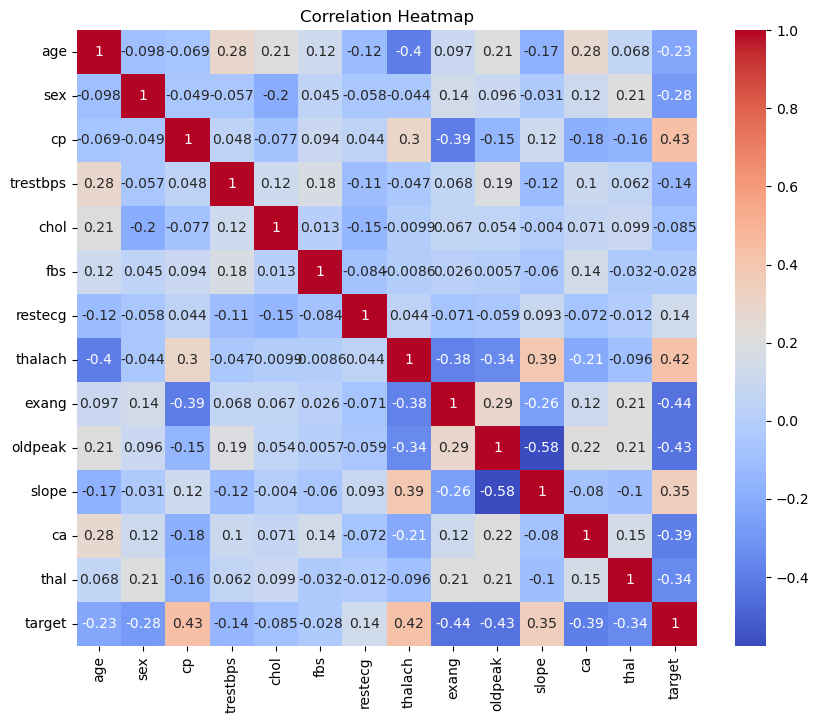

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Index(['target', 'cp', 'thalach', 'slope', 'restecg', 'fbs', 'chol',
       'trestbps', 'age', 'sex', 'thal', 'ca', 'oldpeak', 'exang'],
      dtype='object')


<Axes: >

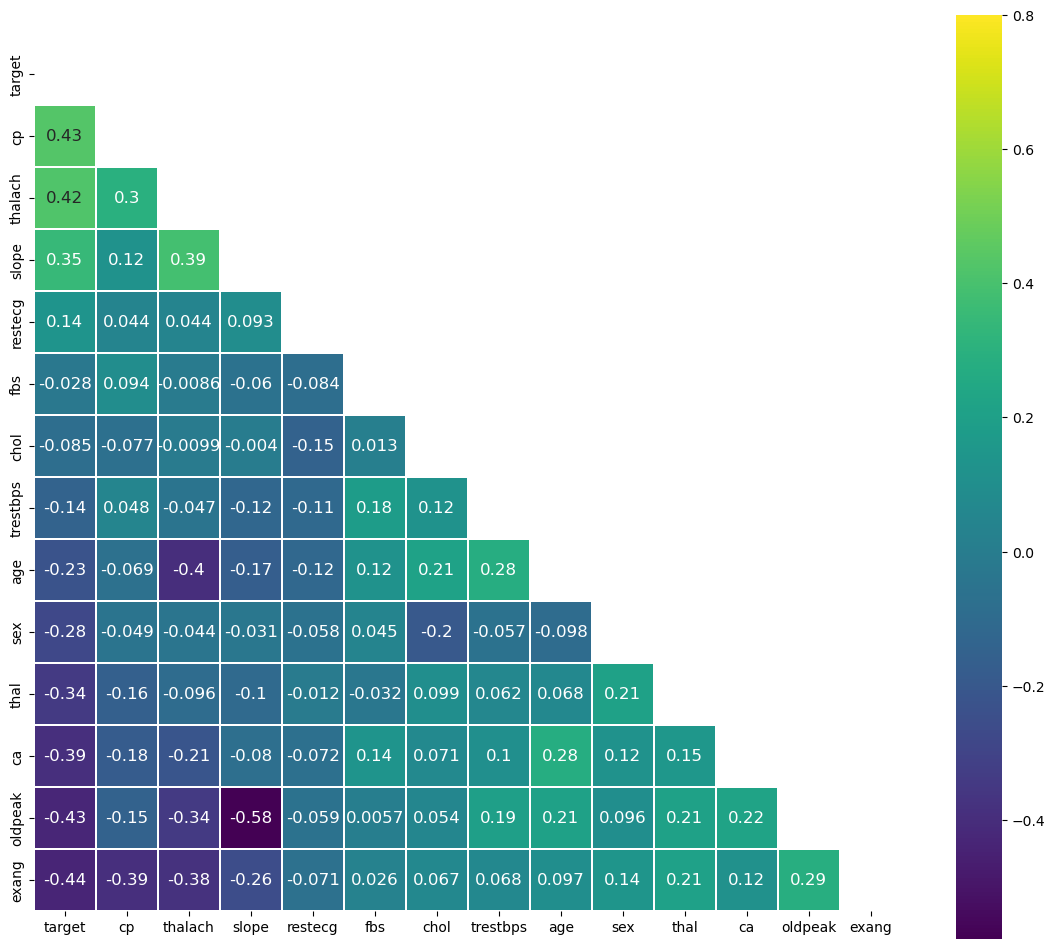

In [68]:
correlation = heart_data.corr()
k= 14
cols = correlation.nlargest(k,'target')['target'].index
print(cols)
cm = np.corrcoef(heart_data[cols].values.T)
mask = np.triu(np.ones_like(heart_data.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Number of Entries: The dataset consists of 303 entries, ranging from index 0 to 302.

#Columns: There are 14 columns in the dataset corresponding to various attributes of the patients and results of tests.

#Data Types: Most of the columns (13 out of 14) are of the int64 data type. Only the oldpeak column is of the float64 data type.

#Missing Values: There don't appear to be any missing values in the dataset as each column has 303 non-null entries.

In [8]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
df = heart_data
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# convert to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]
print(features_to_convert)

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
#age: The average age of the patients is approximately 54.4 years, with the youngest being 29 and the oldest 77 years.

#trestbps: avgg resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.

#chol: avgg cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.

#thalach: avg maximum heart rate achieved is around 149.65, with a range from 71 to 202.

#oldpeak: avg ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.


In [12]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


In [13]:
#sex: There are two unique values, with males (denoted as 0) being the most frequent category, occurring 207 times out of 303 entries.

#cp: Four unique types of chest pain are present. The most common type is "0", occurring 143 times.

#fbs: There are two categories, and the most frequent one is "0" (indicating fasting blood sugar less than 120 mg/dl), which appears 258 times.

#restecg: Three unique results are present. The most common result is "1", appearing 152 times.

#exang: There are two unique values. The most frequent value is "0" (indicating no exercise-induced angina), which is observed 204 times.

#slope: Three unique slopes are present. The most frequent slope type is "2", which occurs 142 times.

#ca: There are five unique values for the number of major vessels colored by fluoroscopy with "0" being the most frequent, occurring 175 times.

#thal: Four unique results are available. The most common type is "2" (indicating a reversible defect), observed 166 times.

#target: Two unique values indicate the presence or absence of heart disease. The value "1" (indicating the presence of heart disease) is the most frequent, observed in 165 entries.

In [15]:
df.isnull().sum().sum()


0

In [16]:
continuous_features


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [17]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

In [18]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [19]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


In [20]:
# Define the features (X) and the output labels (y)
# continuous_features = [col for col in X.columns if X[col].dtype in ['float64', 'int64'] and X[col].nunique() > 10]
# print("Continuous Features:", continuous_features)
# X = df_encoded.drop('target', axis=1)
# y = df_encoded['target']
# Splitting data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
continuous_features


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [21]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)  # Drop the target column to define features
y = df_encoded['target']              # Define the target variable

# Identify continuous features
continuous_features = [col for col in X.columns if X[col].dtype in ['float64', 'int64'] and X[col].nunique() > 10]
print("Continuous Features:", continuous_features)

# Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


Continuous Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [22]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


In [23]:
# Check dataset info
print(df_encoded.info())

# Check for any remaining missing values
print(df_encoded.isnull().sum())

# Preview the cleaned data
print(df_encoded.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int32  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int32  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int32  
 7   oldpeak    303 non-null    float64
 8   slope      303 non-null    int32  
 9   ca         303 non-null    int32  
 10  target     303 non-null    int32  
 11  cp_1       303 non-null    bool   
 12  cp_2       303 non-null    bool   
 13  cp_3       303 non-null    bool   
 14  restecg_1  303 non-null    bool   
 15  restecg_2  303 non-null    bool   
 16  thal_1     303 non-null    bool   
 17  thal_2     303 non-null    bool   
 18  thal_3     303 non-null    bool   
dtypes: bool(8), float64(1), int32(6), int64(4)
memory 

In [24]:
# Check for duplicates
duplicate_count = df_encoded.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 1


In [25]:
# Drop duplicate rows
df_encoded = df_encoded.drop_duplicates()

# Verify removal
print(f"Number of duplicate rows after cleaning: {df_encoded.duplicated().sum()}")


Number of duplicate rows after cleaning: 0


In [26]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [27]:
df_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


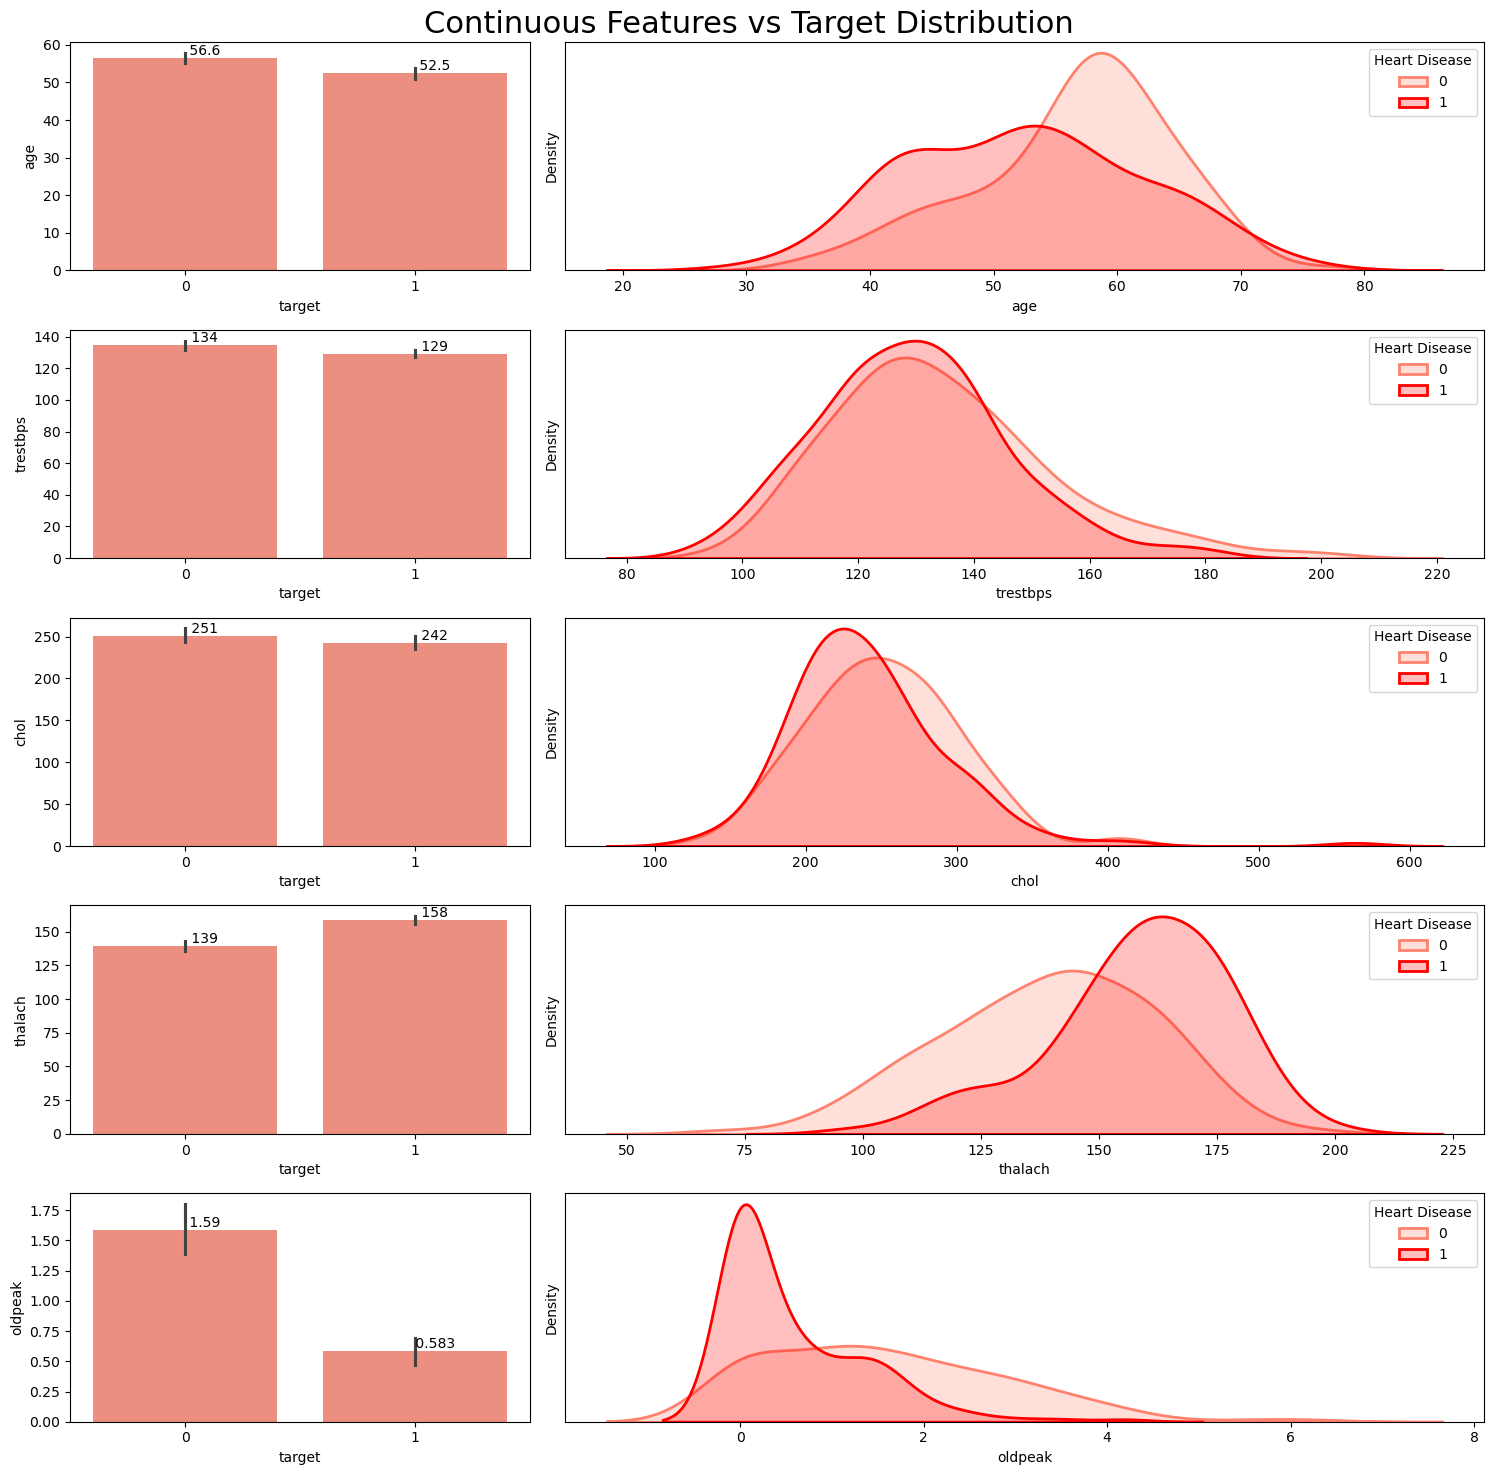

In [29]:
#Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

In [30]:
# Remove 'target' from the categorical_features
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]
categorical_features = [feature for feature in categorical_features if feature != 'target']

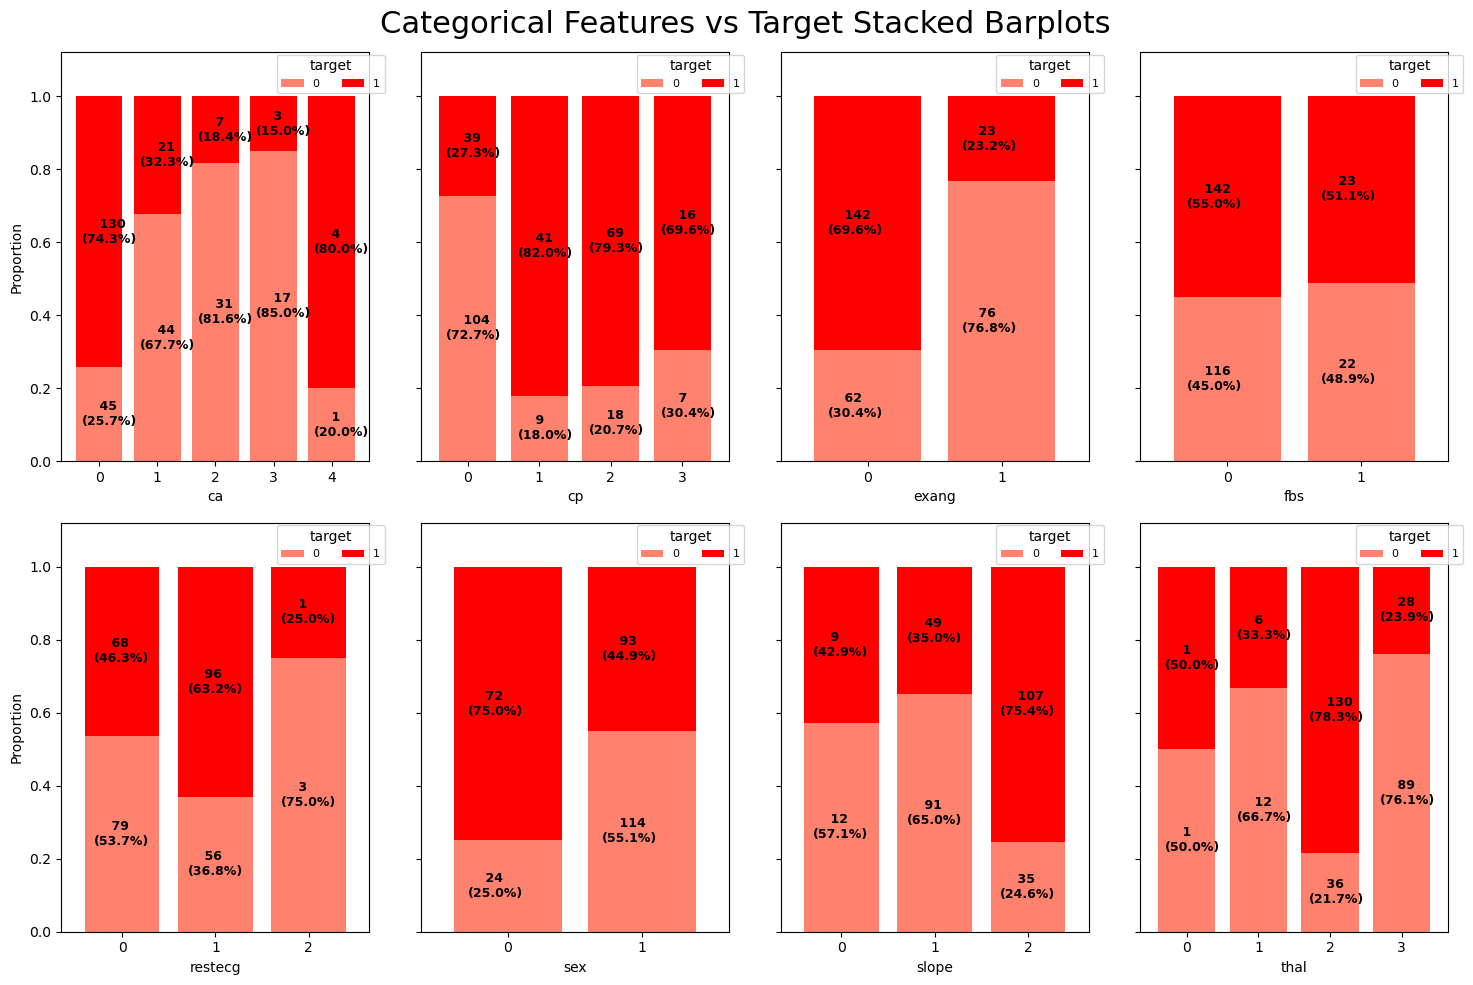

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    #cmp = ListedColormap(['#ff826e', 'red'])

    # Plot stacked bar charts
    x, y = i//4, i%4
    #cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=,
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)


plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


In [32]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [33]:
#Note: In medical scenarios, especially in the context of diagnosing illnesses,
#it's often more important to have a high recall (sensitivity) for the positive class (patients with the condition).
#A high recall ensures that most of the actual positive cases are correctly identified,]
#even if it means some false positives (cases where healthy individuals are misclassified as having the condition).
#The rationale is that it's generally better to have a few false alarms than to miss out on diagnosing a patient with a potential illness.

In [34]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest recall for class 1 is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [35]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [37]:
rf_base = RandomForestClassifier(random_state=0)


In [38]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [39]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


In [40]:

# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       110
           1       0.83      0.87      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [41]:
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [42]:
#Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:

In [43]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df

In [44]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84


In [46]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold


In [47]:
# Define the base KNN model and set up the pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('knn', KNeighborsClassifier())  # Step 2: KNN classifier
])


In [48]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function
    'knn__p': [1, 2]  # Distance metric: 1 (Manhattan), 2 (Euclidean)
}


In [49]:
# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning with GridSearchCV
grid_search_knn = GridSearchCV(knn_pipeline, knn_param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Retrieve the best model and hyperparameters
best_knn = grid_search_knn.best_estimator_
best_knn_hyperparams = grid_search_knn.best_params_

print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)


KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'}


In [50]:
# Evaluate on training data
print("Training Performance:")
print(classification_report(y_train, best_knn.predict(X_train)))


Training Performance:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       110
           1       0.83      0.84      0.83       132

    accuracy                           0.82       242
   macro avg       0.82      0.82      0.82       242
weighted avg       0.82      0.82      0.82       242



In [51]:
# Evaluate on test data
print("Test Performance:")
print(classification_report(y_test, best_knn.predict(X_test)))


Test Performance:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [52]:
# Evaluate the model with a custom function
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
print(knn_evaluation)


     precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
KNN         0.82         0.85      0.82      0.85  0.82  0.85   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
KNN                 0.83              0.83          0.83      0.84  


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define the base SVM model pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('svm', SVC(probability=True))  # Step 2: SVM classifier
])


In [55]:
# Define the hyperparameter grid for SVM
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  # Gamma values
    'svm__degree': [2, 3, 4]  # Degree for polynomial kernel
}


In [56]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform grid search
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Retrieve the best model and hyperparameters
best_svm = grid_search_svm.best_estimator_
best_svm_hyperparams = grid_search_svm.best_params_

print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)


SVM Optimal Hyperparameters: 
 {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [57]:
from sklearn.metrics import classification_report

# Evaluate on training data
print("Training Performance:")
print(classification_report(y_train, best_svm.predict(X_train)))


Training Performance:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       110
           1       0.82      0.92      0.87       132

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242



In [58]:
# Evaluate on test data
print("Test Performance:")
print(classification_report(y_test, best_svm.predict(X_test)))


Test Performance:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [59]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.92,0.84,0.79,0.94,0.85,0.89,0.88,0.86,0.87,0.87


In [60]:
def evaluate_model(model, X_test, y_test, model_name):
    from sklearn.metrics import precision_recall_fscore_support, accuracy_score

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    accuracy = accuracy_score(y_test, y_pred)

    # Create a DataFrame
    evaluation_df = pd.DataFrame({
        'precision_0': [precision[0]],
        'precision_1': [precision[1]],
        'recall_0': [recall[0]],
        'recall_1': [recall[1]],
        'f1_0': [f1[0]],
        'f1_1': [f1[1]],
        'macro_avg_precision': [precision.mean()],
        'macro_avg_recall': [recall.mean()],
        'macro_avg_f1': [f1.mean()],
        'accuracy': [accuracy]
    }, index=[model_name])

    return evaluation_df


In [61]:
# Evaluate each model
#dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'Decision Tree')
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'Random Forest')
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')


# Combine all evaluations
all_evaluations = [ rf_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)

# Display the results
print(results)


               precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
SVM                   0.92         0.84      0.79      0.94  0.85  0.89   
Random Forest         0.85         0.83      0.79      0.88  0.81  0.85   
KNN                   0.82         0.85      0.82      0.85  0.82  0.85   

               macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
SVM                           0.88              0.86          0.87      0.87  
Random Forest                 0.84              0.83          0.83      0.84  
KNN                           0.83              0.83          0.83      0.84  
